# Data Preprocessing in Scikit-learn
In this tutorial, we will use the Titanic dataset to execute data preprocessing in an integrated project with Scikit-learn

## Load the data
We will use the Titanic dataset as this is a common dataset used when learning data science.

You can load the titanic dataset using fetch_openml().

In [5]:
import pandas as pd
from sklearn.datasets import fetch_openml
 
df = fetch_openml('titanic', version=1, as_frame=True)['data']
df.head(3)

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


# Reading - Dataset Description

https://www.openml.org/search?type=data&sort=runs&id=40945&status=active

# Perform exploratory data analysis

# Show null columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    object  
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(5), object(6)
memory usage: 115.4+ KB


# Show missing values

In [7]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<AxesSubplot:title={'center':'Missing values in percentage'}, ylabel='percentage'>

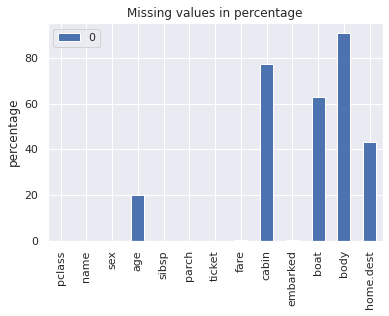

In [8]:
import seaborn as sns
sns.set()
miss_vals = pd.DataFrame(df.isnull().sum() / len(df) * 100)
miss_vals.plot(kind='bar',title='Missing values in percentage',ylabel='percentage')


## Handle Missing Data
We can handle missing data in two ways:

1. Remove it (dropping)
2. Imputing it from the whole dataset (using the mean, median, mode…)

In [9]:
len(df.columns)

13

# Dropping missing data

You could drop rows and columns with missing values, at risk of losing too much information. However, it is preferable to impute data from the entire dataset.

In [10]:
print(f'Size of the dataset: {df.shape}')
df.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)
df.dropna(inplace=True)
print(f'Size of the dataset after dropping: {df.shape}')

Size of the dataset: (1309, 13)
Size of the dataset after dropping: (1043, 9)


In [11]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked'],
      dtype='object')

In [12]:
len(df.columns)

9

# Imputing missing data

You can replace missing values by using the most common value, or the mean for example.

Both pandas and sklearn can be used to fill missing values.

In [13]:
import pandas as pd
from sklearn.datasets import fetch_openml
 
df = fetch_openml('titanic', version=1, as_frame=True)['data']
print(f'Number of null values in the age column: {df.age.isnull().sum()}')

Number of null values in the age column: 263


/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Imputing with Pandas

In [14]:
import pandas as pd
from sklearn.datasets import fetch_openml
 
df = fetch_openml('titanic', version=1, as_frame=True)['data']
 
df['age'].fillna(df['age'].mean(), inplace=True)
print(f'Number of null values: {df.age.isnull().sum()}')

Number of null values: 0


# Imputing with Scikit-learn
Scikit-learn imputers, also known as transformers, can be used to fill missing values.

Using SimpleImputer we will replicate the operation we did in pandas to fill missing values with the mean of the age column.

The SimpleImputer class works with the fit_transform method that executes both the fit() and the transform() methods in a single line.

In [15]:
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
 
df = fetch_openml('titanic', version=1, as_frame=True)['data']
 
print(f'Number of null values before: {df.age.isnull().sum()}')
 
imp = SimpleImputer(strategy='mean')
df['age'] = imp.fit_transform(df[['age']])
 
print(f'Number of null values after: {df.age.isnull().sum()}')

Number of null values before: 263
Number of null values after: 0


In [16]:
# Sometimes, the missing values are not in the nan format.

print('Data types of missing values')
for col in df.columns[df.isnull().any()]:
    print(col, df[col][df[col].isnull()].values[0])

Data types of missing values
fare nan
cabin None
embarked nan
boat None
body None
home.dest None


In [17]:
# You can deal with different types of missing values using the missing_values keyword.

from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
 
df = fetch_openml('titanic', version=1, as_frame=True)['data']
 
imp = SimpleImputer(missing_values=None,strategy='most_frequent')
df['cabin'] = imp.fit_transform(df[['cabin']])
 
df.cabin.isnull().sum()

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


0

## Create New Features (Feature Engineering)
Feature engineering is the process of using domain knowledge to extract features from raw data.

For example, we can use feature engineering to infer if the person travelled alone by looking at who they travelled with.

SibSp captures the number of siblings that the passengers travelled with.
Parch captures the number of parents and children that the passengers travelled with.
By combining each, we can find out if they travelled alone.

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<AxesSubplot:title={'center':'Passenger travelled alone?'}>

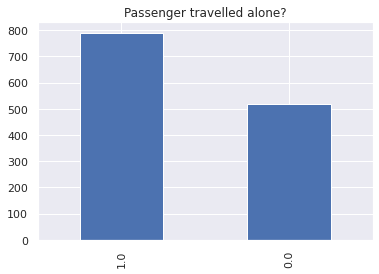

In [29]:
from sklearn.datasets import fetch_openml
 
df = fetch_openml('titanic', version=1, as_frame=True)['data']
 
df['family'] = df['sibsp'] + df['parch']
df.loc[df['family'] > 0, 'travelled_alone'] = 0
df.loc[df['family'] == 0, 'travelled_alone'] = 1
df['travelled_alone'].value_counts().plot(title='Passenger travelled alone?',kind='bar')


In [30]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family,travelled_alone
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",0.0,1.0
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3.0,0.0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",3.0,0.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",3.0,0.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",3.0,0.0


# Encode categorical features
When dealing with classification problems, you need to encode categorical features numerically on a continuous scale.

The Scikit-learn API requires categorical features to be converted into binary arrays (0s, 1s).

There are two ways that we can achieve this.
1. sciki-learn: OneHotEncoder()
2. pandas: get_dummies()

# Encoding categorical features with Scikit-learn
To convert categorical features with Scikit-learn, use OneHotEncoder() with the fit_transform() method.

In [19]:
import pandas as pd 
 
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
 
df = fetch_openml('titanic', version=1, as_frame=True)['data']
 
df[['female','male']] = OneHotEncoder().fit_transform(df[['sex']]).toarray()
df[['sex','female','male']] 


,sex,female,male
0,female,1.0,0.0
1,male,0.0,1.0
2,female,1.0,0.0
3,male,0.0,1.0
4,female,1.0,0.0
...,...,...,...
1304,female,1.0,0.0
1305,female,1.0,0.0
1306,male,0.0,1.0
1307,male,0.0,1.0


But this is redundant. All this information could be stored in a single column where female is 0 and male is 1 (or vice versa). To do so, well select the Male column from the array resulting from the fit_transform method. Now we only have one usable sex column, encoded in binaries where 0 == female and 1 == male.

In [32]:
import pandas as pd 
 
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
 
df = fetch_openml('titanic', version=1, as_frame=True)['data']
df['sex'] = OneHotEncoder().fit_transform(df[['sex']]).toarray()
df.head() 

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",1.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",0.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",1.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",0.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


## Encoding categorical features with Pandas
The alternative to OneHotEncoder is the pandas get_dummies() method.

To replicate the same thing we just did is much simpler in pandas, by selecting the column to encode and using the drop_first keyword to remove redundant features

In [21]:
import pandas as pd 
 
from sklearn.datasets import fetch_openml
 
df = fetch_openml('titanic', version=1, as_frame=True)['data']
 
df['sex'] = pd.get_dummies(df['sex'],drop_first=True)
 
df.head(3)

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


# Encoding all categorical features
Since this is a tutorial on Scikit-learn, we will use OneHotEncoder to convert all categorical features to binary format.

What we will do is:

1. Load data
2. Select categorical columns using the select_dtypes(include=['category']) method
3. Create a loop to iterate through each of the selected columns. For each column:
a. Impute missing values
b. Create a list of the feature’s labels
c. Use this list as column headers where to add the resulting array from OneHotEncoder
d. Drop the redundant columns

In [22]:
import pandas as pd 
 
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
 
df = fetch_openml('titanic', version=1, as_frame=True)['data']
 
# Select columns which dtype == 'category'
cat_cols = df.select_dtypes(include=['category']).columns
print(f'Categorical columns: {cat_cols}')
 
# Loop through each categorical column 
for col in cat_cols:
    # Impute missing values
    fill_value = df[col].mode()[0] 
    df[col].fillna(fill_value, inplace=True)
     
    # create a list of labels to be encoded in the column
    append_to = list(df[col].unique())
 
    # These labels will be use as column headers
    print(append_to)
 
    # Apply OneHotEncoder()
    df[append_to] = OneHotEncoder().fit_transform(df[[col]]).toarray()
 
    # Drop non-encoded column
    df.drop(col, axis=1, inplace=True)
 
    # Drop redundant data
    df.drop(append_to[0], axis=1, inplace=True)
 
print(df.columns)
df[['male','C','Q']].head(3)

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Categorical columns: Index(['sex', 'embarked'], dtype='object')
['female', 'male']
['S', 'C', 'Q']
Index(['pclass', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin',
       'boat', 'body', 'home.dest', 'male', 'C', 'Q'],
      dtype='object')


,male,C,Q
0,0.0,0.0,1.0
1,1.0,0.0,1.0
2,0.0,0.0,1.0


We now see new columns where the male column shows the encode sex feature and the C and Q the encoded embarked feature. There were 3 different port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) in the Titanic dataset, but now we have two columns (C and Q).

Why?

Because, we can infer that when the port of embarkation isn’t Q or S, it is C. Thus, we removed the first feature as it was redundant.

#Further Reading on Dealing With Categorical Features

**For Reading** - https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79

**Code** - https://github.com/chongjason914/scikit-learn-tutorial/blob/main/feature-encoding.ipynb

# Scale numeric features

# MinMaxScaler
MinMaxScaler() puts all numeric values on a scale from 0 to 1.

In [23]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
 
df = fetch_openml('titanic', version=1, as_frame=True)['data']
 
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns
print(num_cols)
 
# Impute missing values
for col in num_cols:
    fill_value = df[col].mean()
    df[col].fillna(fill_value, inplace=True)
 
# Apply MinMaxScaler
minmax = MinMaxScaler()
df[num_cols] = minmax.fit_transform(df[num_cols])
df[num_cols]

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


,pclass,age,sibsp,parch,fare
0,0.0,0.361169,0.000,0.000000,0.412503
1,0.0,0.009395,0.125,0.222222,0.295806
2,0.0,0.022964,0.125,0.222222,0.295806
3,0.0,0.373695,0.125,0.222222,0.295806
4,0.0,0.311064,0.125,0.222222,0.295806
...,...,...,...,...,...
1304,1.0,0.179540,0.125,0.000000,0.028213
1305,1.0,0.372206,0.125,0.000000,0.028213
1306,1.0,0.329854,0.000,0.000000,0.014102
1307,1.0,0.336117,0.000,0.000000,0.014102


# StandardScaler
StandardScaler() puts all numeric values on a scale where the mean equals 0 and the standard deviation equals 1.

In [33]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
 
df = fetch_openml('titanic', version=1, as_frame=True)['data']
 
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns
print(num_cols)
 
# Impute missing values
for col in num_cols:
    fill_value = df[col].mean()
    df[col].fillna(fill_value, inplace=True)
 
# Apply StandardScaler
ss = StandardScaler()
df[num_cols] = ss.fit_transform(df[num_cols])
df[num_cols]

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


,pclass,age,sibsp,parch,fare
0,-1.546098,-6.842022e-02,-0.479087,-0.445000,3.442480
1,-1.546098,-2.249092e+00,0.481288,1.866526,2.286476
2,-1.546098,-2.164974e+00,0.481288,1.866526,2.286476
3,-1.546098,9.229922e-03,0.481288,1.866526,2.286476
4,-1.546098,-3.790208e-01,0.481288,1.866526,2.286476
...,...,...,...,...,...
1304,0.841916,-1.194347e+00,0.481288,-0.445000,-0.364300
1305,0.841916,2.758687e-16,0.481288,-0.445000,-0.364300
1306,0.841916,-2.625456e-01,-0.479087,-0.445000,-0.504078
1307,0.841916,-2.237205e-01,-0.479087,-0.445000,-0.504078


Using the describe() method, we can look at the mean and standard deviation of the scaled numeric columns.

The mean does not look to equal 0 but in fact, 4.995749e-15 equals 0.000000000000004995749. This is so close to 0 that it can be considered to be equal 0. The same goes with the standard deviation that is so close to 1 that it can be considered equal to 1.

# Create a Machine Learning Model
For the purpose of simplicity, we will not add training and testing datasets. I just want to show how to run a basic machine learning model with Scikit-learn.

In [25]:
from sklearn.datasets import fetch_openml
from sklearn.naive_bayes import GaussianNB
 
X, y = fetch_openml('titanic', version=1, as_frame=True, return_X_y=True)
 
# impute missing values
X['age'].fillna(X['age'].mean(), inplace=True)
X['embarked'].fillna(X['embarked'].mode(), inplace=True)
 
# handle categorical data
X = pd.get_dummies(X[['age','embarked', 'sex','pclass']],drop_first=True)
 
# fit machine learning model
model = GaussianNB()
model.fit(X, y)
 
# make prediction
model.predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array(['1', '1', '1', ..., '0', '0', '0'], dtype='<U1')

# Building a pipeline
Now, we have covered a lot. There is one last thing that I want to discuss is how to integrate all these steps into a Scikit-learn pipeline.

Building a pipeline would require a post of its own and we have already covered quite a lot.

Let’s just explain briefly what the code does and keep the details out.

Using the Pipeline class, we create a series of steps that we want to execute in order.

1. Load the dataset
2. Create a transformer to impute, then scale numeric data
3. Create a transformer to convert categorical data to binary
4. Define which transformer to apply to which column (numeric and categorical data need different preprocessing). Store as a preprocessor.
5. Add the preprocessor and a machine learning model to the steps of the Pipeline, in the order to be executed.
6. Create a training and testing datasets to be able to evaluate the model later.
7. Train the model using the fit() method.
8. Evaluate the model using the score() method.

# Naive Bayes

In [26]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
 
# load dataset
X, y = fetch_openml('titanic', version=1, as_frame=True, return_X_y=True)
 
# Impute and scale numeric data
numeric_features = ['age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
 
# Convert categorical data to binary
categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
 
# Define which transformer to apply to which data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
 
# Add the transformers to the steps and execute the machine learning model
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GaussianNB())])
 
# Split into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
 
# Train the model on the training dataset
model.fit(X_train, y_train)
 
# evaluate the model by comparing results to the test dataset.
print(f'Model score: {model.score(X_test, y_test)}')

Model score: 0.628498727735369


/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# DecisionTree

In [27]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
 
# load dataset
X, y = fetch_openml('titanic', version=1, as_frame=True, return_X_y=True)
 
# Impute and scale numeric data
numeric_features = ['age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
 
# Convert categorical data to binary
categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
 
# Define which transformer to apply to which data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
 
# Add the transformers to the steps and execute the machine learning model
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])
 
# Split into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
 
# Train the model on the training dataset
model.fit(X_train, y_train)
 
# evaluate the model by comparing results to the test dataset.
print(f'Model score: {model.score(X_test, y_test)}')


/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Model score: 0.7455470737913485


# Neural Network

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
 
# load dataset
X, y = fetch_openml('titanic', version=1, as_frame=True, return_X_y=True)
 
# Impute and scale numeric data
numeric_features = ['age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
 
# Convert categorical data to binary
categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
 
# Define which transformer to apply to which data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
 
# Add the transformers to the steps and execute the machine learning model
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', MLPClassifier())])
 
# Split into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
 
# Train the model on the training dataset
model.fit(X_train, y_train)
 
# evaluate the model by comparing results to the test dataset.
print(f'Model score: {model.score(X_test, y_test)}')

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Model score: 0.7989821882951654


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
